# Segmentação e reconhecimento de células em exames de Papanicolau

### Componentes do grupo: Rafael Lopes Murta

## Importações

In [1]:
import tensorflow.keras as keras
import pandas as pd
from PIL import Image
from os import listdir
from os.path import isfile, join

In [2]:
classifications_csv = pd.read_csv('classifications.csv')

## Visualizações

In [3]:
classifications_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11534 entries, 0 to 11533
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_id         11534 non-null  int64 
 1   image_filename   11534 non-null  object
 2   image_doi        11534 non-null  object
 3   cell_id          11534 non-null  int64 
 4   bethesda_system  11534 non-null  object
 5   nucleus_x        11534 non-null  int64 
 6   nucleus_y        11534 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 630.9+ KB


In [4]:
classifications_csv.head()

,image_id,image_filename,image_doi,cell_id,bethesda_system,nucleus_x,nucleus_y
0,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,1,SCC,792,462
1,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,2,SCC,601,678
2,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,3,SCC,363,467
3,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,4,SCC,599,437
4,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,5,Negative for intraepithelial lesion,1186,450


In [5]:
classifications_csv['bethesda_system'].drop_duplicates()

0                                     SCC
4     Negative for intraepithelial lesion
6                                    LSIL
8                                    HSIL
9                                   ASC-H
98                                 ASC-US
Name: bethesda_system, dtype: object

## Funções

In [6]:
# Corta a imagem no tamanho de 100x100 pixels
def crop_image(original_filename, x, y, new_filename):
    image = Image.open(original_filename)
    width, height = image.size
    if(x < 50):
        left = 0
        right = 100
    elif(x > width - 50):
        left = width - 100
        right = width
    else:
        left = x - 50
        right = x + 50
    if (y < 50):
        top = 0
        bottom = 100
    elif(y > height - 50):
        top = height - 100
        bottom = height
    else:
        top = y - 50
        bottom = y + 50
    image = image.crop((left, top, right, bottom))
    image.save(new_filename)

In [7]:
# Define o diretorio para que a imagem cortada seja salva
def get_img_dir(bethesda_system):
    if bethesda_system == 'SCC' or bethesda_system == 'LSIL' or bethesda_system == 'HSIL' or bethesda_system == 'ASC-H' or bethesda_system == 'ASC-US':
        return 'editted_images/' + bethesda_system.lower() + '/'
    elif bethesda_system == 'Negative for intraepithelial lesion':
        return 'editted_images/nfil/'


## Salvar as imagens nas respectivas pastas

In [8]:

onlyfiles = [f for f in listdir('images') if isfile(join('images', f))]
for index, row in classifications_csv.iterrows():
    if row["image_filename"] in onlyfiles:
        crop_image(f'images/{row["image_filename"]}', row['nucleus_x'], row['nucleus_y'], f'{get_img_dir(row["bethesda_system"])}{row["cell_id"]}.jpg')


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

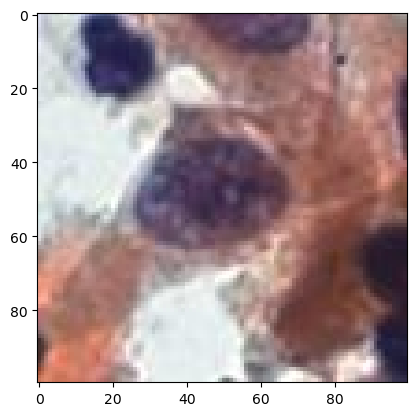

In [18]:
img = cv2.imread('editted_images/asc-h/10.jpg',cv2.IMREAD_UNCHANGED)
# img = Image.open('editted_images/asc-h/10.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Mostrar a imagem
plt.imshow(img)
plt.show()

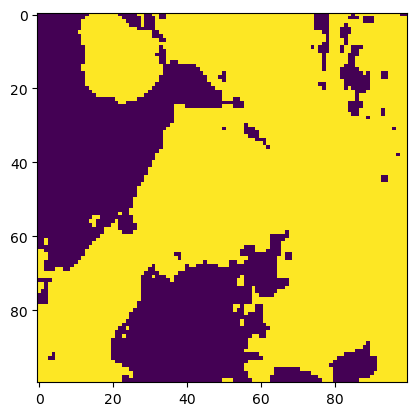

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Mostrar a imagem
plt.imshow(thresh)
plt.show()

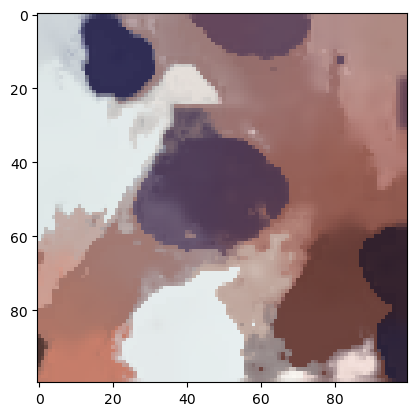

In [26]:
filtro = cv2.pyrMeanShiftFiltering(img, 10, 40)
plt.imshow(filtro)
plt.show()

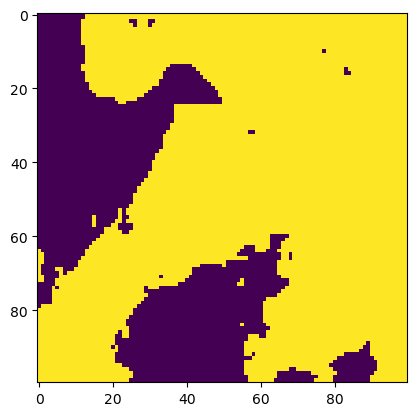

In [27]:
gray = cv2.cvtColor(filtro, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Mostrar a imagem
plt.imshow(thresh)
plt.show()